In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [7]:
cancer = datasets.load_breast_cancer()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
clf = KNeighborsClassifier()

In [12]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
clf.score(X_test, Y_test)

0.95104895104895104

In [15]:
clf.kneighbors()

(array([[  14.3908309 ,   16.39719794,   17.06866964,   18.16771941,
           19.6100092 ],
        [  16.06923809,   66.63172654,   86.23022834,   92.56071112,
          121.45948418],
        [  21.01760286,   23.11015624,   24.9002722 ,   25.95306343,
           26.33474424],
        ..., 
        [  15.58763714,   26.01253618,   37.3053592 ,   38.58039414,
           42.13588318],
        [  22.99168013,   23.54168454,   23.79850821,   24.98779424,
           25.28392703],
        [  36.90319726,   98.97545007,  106.22169107,  107.1168459 ,
          114.03079505]]), array([[197, 281,  74, 196, 301],
        [273, 113, 348, 403, 152],
        [146, 283, 304, 198, 419],
        ..., 
        [377, 203, 232, 204, 346],
        [253, 198,  84, 112, 164],
        [354, 271, 406, 260,  82]]))

In [16]:
clf.kneighbors_graph()

<426x426 sparse matrix of type '<class 'numpy.float64'>'
	with 2130 stored elements in Compressed Sparse Row format>

In [17]:
Y_predict = clf.predict_proba(X_test)

In [18]:
Y_predict

array([[ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 0.8,  0.2],
       [ 0. ,  1. ],
       [ 0.6,  0.4],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0.2,  0.8],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0.6,  0.4],
       [ 0. ,  1. ],
       [ 0.2,  0.8],
       [ 0.2,  0.8],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0.8,  0.2],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0.2,  0.8],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0.8,  0.2],
       [ 0.8,  0.2],
       [ 0. ,  1. ],
       [ 0.8,  0.2],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0.2,  0.8],
       [ 0.6,  0.4],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 0.2,  0.8],
       [ 0.6,

In [ ]:
## cross validation
## printing neighbours
## cross validation score v/s value of k graph

In [27]:
K = []
crossvalidationScore = []

for k in range(1,101,2):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    crossvalidationScore.append(score)
    K.append(k)
    


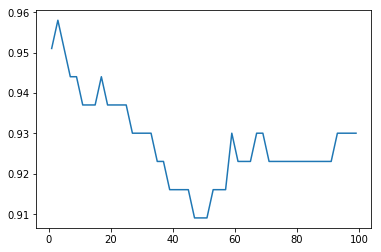

In [28]:
plt.plot(K,crossvalidationScore)
plt.show()

In [26]:
X_test.shape

(143, 30)

In [31]:
K = []
crossvalidationScore = []

for k in range(1,101,2):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
    scores = cross_val_score(clf, X_train, Y_train, scoring = "accuracy")
    #saare splits ke liye alag alag score aata hai
    crossvalidationScore.append(scores.mean())
    K.append(k)
    


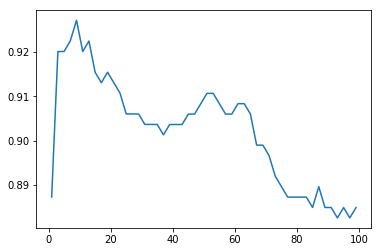

In [32]:
plt.plot(K,crossvalidationScore)
plt.show()

In [34]:
optimal_k = K[crossvalidationScore.index(max(crossvalidationScore))]
optimal_k

9

In [35]:
X_train.shape

(426, 30)

In [36]:
Y_train.shape

(426,)

In [38]:
Y_predict = clf.predict(X_test)

In [41]:
Y_predict - Y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0])